# Random Forests
Random forests overcome decision trees' tendency to overfit--that is, to work well for a training dataset, but degrade when exposed to new data.  To overcome this limitation, an ensemble method--called 'random forests' are used.

Random forests create dozens (or even hundreds) of randomized decision trees, using randomized subsets of data.  Each tree is therefore different, but the advantage is that the ensemble will do a better job of predicting than just one tree.  This power of crowds dramatically improves the efficacy of decision trees.



The following code loads up the iris data and completes the feature engineering from the last class.

In [125]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
import sklearn
import pandas as pd
iris = load_iris()

In [126]:
iris = load_iris()
df = pd.DataFrame(iris.data)
cols = ['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']
df.columns = cols
df['target'] = iris.target
df['species'] = 'Iris Setosa'
df.loc[df.target == 1, 'species'] = 'Iris Versicolour' 
df.loc[df.target == 2, 'species'] = 'Iris Virginica'

X = df[['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']]

names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
y = df['target']

In [127]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'species'],
      dtype='object')

In [128]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,df['target'])

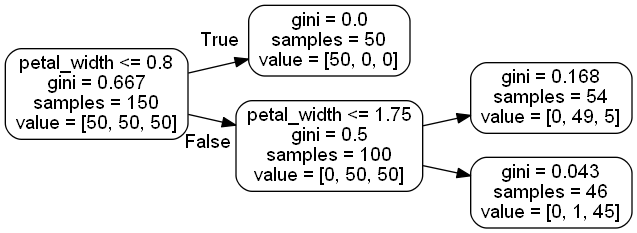

In [129]:
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
        feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Random Forests
Random forests choose a subset of features as well as a subset of dataframe rows to generate a new decision tree.  This process is then repeated dozens, hundreds, or even thousands of times.  The power of random forests is comparing the accuracy results across the generated trees.  Consistent results indicates 

### Train/Test Split
The following divides the dataset into 70\% training and 30\% testing.  We will use the train set to train our decision tree.  We will then run the *test* data set using clf object (which contains all parameters for the trained decision tree), to see how it performs on data that it has never seen.

The train/test concept allows us to explore the generalizability of our model: if the model performance is consistent, this is evidence that the model generalizes--that is, is not overfit. This also indicates that we can be more confident on applying our model to classify new irises.

In [130]:
# reminder: random_state will ensure you get the same results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, \
        test_size = 0.3, random_state = 42) 

### Train the Model using the Train dataset

In [131]:
from sklearn.ensemble import RandomForestClassifier

# generate 10 decision trees
clf = RandomForestClassifier(n_estimators=10, verbose=0, bootstrap=True, max_depth=2, \
            random_state=42) 
clf = clf.fit(X_train,y_train)

preds = clf.predict(X_train)
probs = clf.predict_proba(X_train)
accuracy = round(clf.score(X_train,y_train)*100,2) # make it a percentage and round to 2 places
print(accuracy)

94.29


In [132]:
print(clf.feature_importances_)

[0.18235931 0.         0.292432   0.52520869]


The above is perhaps a powerful result: this indicates the relative power of each of the included features in predicting the species of iris.  According to this, therefore, the relative contribution of each is: 
* sepal_length: 14.1\%
* sepal_width: 2\%
* petal_length: 43.3\%
* petal_width: 40.4\%

At least within our decision tree, the petal dimensions were by far the most important in classifying the iris species.

### Generate a Confusion Matrix to Gauge our Training Results

In [133]:
y_train.value_counts()

2    37
1    37
0    31
Name: target, dtype: int64

In [134]:
# Store the probability and prediction of each iris
preds = clf.predict(X_train)
probs = clf.predict_proba(X_train)

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, preds)

array([[31,  0,  0],
       [ 0, 35,  2],
       [ 0,  4, 33]], dtype=int64)

A confusion matrix is a powerful summary of our model's performance.  The rows represent the actual species (0,1,2), while the columns represent the predicted species.  The diagonal (upper left to lower right) indicates the correct classifications.  If our model is perfect, only the diagonals would have numbers: the rest would be 0.  

The number 2 in the second row is an off-diagonal, so it is a misclassification.  The model predicted that the species was 2, but it was actually 1 (remember to start counting with 0!).  This is the only error, so the accuracy of our tree, therefore, is:

`(31+35+33)/(31+35+33+2+4) = 94.29%`

We can confirm this:

In [136]:
accuracy = round(clf.score(X_train,y_train)*100,2) # make it a percentage and round to 2 places
print(accuracy)

94.29


So the results indicate that our trained model does a good job of classifying iris species.  The question, however, is: how well does it generalize?  If our model is too tied to this particular dataset, that is called _overfitting_.  It indicates that the model will not generalize to new irises.  

This is a major concerns with decision trees, so we need to confirm that our model will generalize.  Fortunately, we withheld 30\% of our data in the X_test data set, so we can now see how well the model performs with new data!

### Use the test data to test the generalizability of our model
Now that we have trained a decision tree, let's test its generalizability by running it using the test data.  If the results are similar, we have a generalizable model.

This is good.  80.25 is very close to the accuracy using the training dataset (80.74)!

In [137]:
# Store the probability and prediction of each iris
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

### Generate a Confusion Matrix to Gauge our Test Results

In [138]:
confusion_matrix(y_test, preds)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [139]:
accuracy = round(clf.score(X_test,y_test)*100,2) # make it a percentage and round to 2 places
print(accuracy)

100.0


Wow.  No overfit here! The model actually performs _better_ (examine the confusion matrix results to confirm that).

## Why Model Overfit is a Big Deal
The results indicate that our model is not overfitted, so it is natural at this point to assume overfit is rarely a problem.  At least with regard to decision trees, that is not true.  _You should always train/test your decision tree models, to ensure your results are generalizable._

One of the reasons we didnt have a problem is that we restricted the model depth to two.  Turns out, the model will continue to improve if we add depth, but the iris dataset is popular _becasuse_ the flowers are easily categorized.  Real data will rarely behave as well.  Just be prepared to train and test your results!